# Kamień milowy 2(feature engineering and baseline)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.pipeline import Pipeline
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster import hierarchy

In [2]:
data = pd.read_csv("data.csv")
X = data.drop(["subject", "Activity", "ActivityName"], axis=1)
y = data["Activity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean
5538,0.267568,-0.015712,-0.065980,-0.995271,-0.977984,-0.963060,-0.996078,-0.980578,-0.961130,-0.942153,...,0.420093,-0.616825,-0.794250,-0.004331,0.212652,-0.370062,-0.352681,-0.837084,0.099222,-0.101149
2755,0.277109,-0.013876,-0.112776,-0.997565,-0.987851,-0.992859,-0.997805,-0.987097,-0.994136,-0.942406,...,0.545749,-0.785950,-0.956767,-0.041486,0.331615,0.036768,0.112289,-0.872126,0.009535,0.043758
5813,0.223730,-0.048263,-0.105781,-0.461582,-0.094674,-0.287821,-0.511609,-0.119351,-0.311649,-0.078237,...,0.221168,-0.175540,-0.545833,0.307722,0.490644,-0.842834,-0.607873,-0.854541,0.180849,-0.041994
7506,0.285830,-0.004668,-0.152746,-0.433399,0.009730,0.120867,-0.491119,0.047058,0.087327,-0.151067,...,-0.000990,-0.107975,-0.507438,-0.310129,0.097989,0.527328,-0.689166,-0.306913,0.303946,0.452417
1334,0.270514,-0.019739,-0.129706,-0.988424,-0.980260,-0.968742,-0.989403,-0.978525,-0.967611,-0.933788,...,0.342991,-0.547240,-0.800976,0.001274,-0.359362,0.041658,-0.338905,-0.791197,0.139212,0.162886


## Feature engineering 

In [4]:
def drop_correlated(X, threshold=0.97):
    corr_df = X.corr().abs()
    columns_to_leave = np.ones((corr_df.shape[0], 1), dtype=bool)
    for i in range(corr_df.shape[0]):
        if columns_to_leave[i]:
            for j in range(i+1, corr_df.shape[0]):
                if corr_df.iloc[i, j] >= threshold:
                    columns_to_leave[j] = False
    columns_to_leave =  columns_to_leave.reshape(1, corr_df.shape[0])[0]
    return X.loc[:, columns_to_leave]

In [5]:
X_train = drop_correlated(X_train)
X_train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,...,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean
5538,0.267568,-0.015712,-0.065980,-0.995271,-0.977984,-0.963060,-0.550491,-0.789656,0.843383,0.691476,...,-0.995824,-0.996387,-1.000000,0.420093,-0.616825,-0.794250,-0.004331,0.212652,-0.370062,-0.352681
2755,0.277109,-0.013876,-0.112776,-0.997565,-0.987851,-0.992859,-0.564823,-0.822405,0.846542,0.691177,...,-0.999933,-0.997907,-0.523810,0.545749,-0.785950,-0.956767,-0.041486,0.331615,0.036768,0.112289
5813,0.223730,-0.048263,-0.105781,-0.461582,-0.094674,-0.287821,-0.129826,-0.334681,0.386961,0.081401,...,-0.909415,-0.583603,-0.904762,0.221168,-0.175540,-0.545833,0.307722,0.490644,-0.842834,-0.607873
7506,0.285830,-0.004668,-0.152746,-0.433399,0.009730,0.120867,-0.146341,-0.294388,0.424646,0.031001,...,-0.495843,-0.588718,-0.904762,-0.000990,-0.107975,-0.507438,-0.310129,0.097989,0.527328,-0.689166
1334,0.270514,-0.019739,-0.129706,-0.988424,-0.980260,-0.968742,-0.567375,-0.810410,0.836722,0.682680,...,-0.996252,-0.993925,-1.000000,0.342991,-0.547240,-0.800976,0.001274,-0.359362,0.041658,-0.338905


In [73]:
def reshape(components):
    res = np.zeros((2, components.shape[0]))
    for i in range(len(components)):
        res[0][i] = components[i][0]
        res[1][i] = components[i][1]
    return res

def get_components(model, X, perplexity=None):
    transformer = None 
    if model == "PCA":
        transformer = PCA(n_components = 2)
    elif model == "TSNE":
        if perplexity is None:
            transformer = Pipeline(
                [("pca", PCA(n_components = 60)),
                ("tsne", TSNE(n_components = 2))
                ])
        else:
            transformer = pipeline = Pipeline(
            [("pca", PCA(n_components = 60)),
            ("tsne", TSNE(n_components = 2, 
                          perplexity = perplexity,
                         random_state = 42))
            ])
    
    X_transformed = transformer.fit_transform(X)
    X_transformed = reshape(X_transformed)
    return X_transformed
    
def plot_components(model, X, perplexity=None, labels=None, comp=False, title=True,
                   legend_labels=None):
    X_transformed = None
    if not comp:
        X_transformed = get_components(model, X, perplexity)
    else:
        X_transformed = reshape(X)
    plt.rcParams["figure.figsize"] = [20,15]
    scatter = None
    fig, ax = plt.subplots()
    if labels is not None and legend_labels is None:
        ax.scatter(X_transformed[0], X_transformed[1], c=labels, cmap="coolwarm")
    if labels is None and legend_labels is None:
        ax.scatter(X_transformed[0], X_transformed[1])
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    if title:
        ax.set_title(model)
    if legend_labels is not None:
        for g in np.unique(labels):
            i = np.where(labels == g)
            ax.scatter(X_transformed[0][i], X_transformed[1][i], label=legend_labels[g-1])
        ax.legend()

def choose_best_tsne(X, perplexity=30, iterations=10, pca=True):
    np.random.seed(42)
    random_states = np.random.choice(100, iterations, replace=False)
    best_model = None
    best_score = np.inf
    
    X_transformed = None
    if pca:
        X_transformed = PCA(n_components = 60).fit_transform(X)
    else:
        X_transformed = X
    
    for i in range(iterations):
        tsne = TSNE(n_components = 2, 
                    perplexity = perplexity,
                    random_state = random_states[i])
        tsne.fit(X_transformed)
        if tsne.kl_divergence_ < best_score:
            best_score = tsne.kl_divergence_
            best_model = tsne
    
    return best_model

### Bez PCA

### Z PCA

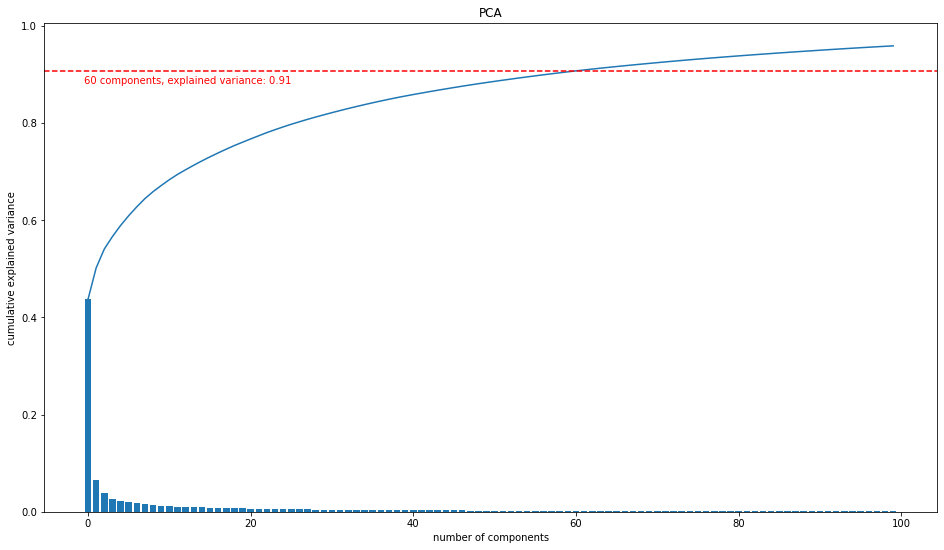

In [14]:
pca = PCA()
pca.fit(X_train)
explained_variance = pca.explained_variance_ratio_
n = 100
m = 60
m_comp_explained_variance = np.sum(explained_variance[0:m+1])

plt.rcParams["figure.figsize"] = [16,9]
plt.plot(np.cumsum(explained_variance[0:n]))
plt.bar(np.arange(n), explained_variance[0:n])
plt.axhline(y=m_comp_explained_variance, color="r", linestyle="dashed")
plt.text(25,m_comp_explained_variance-0.02, 
         str(m) + " components, explained variance: " + "{:.2f}".format(m_comp_explained_variance), 
         color="red", 
        ha="right", va="center")
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance");
plt.title("PCA")
plt.show()

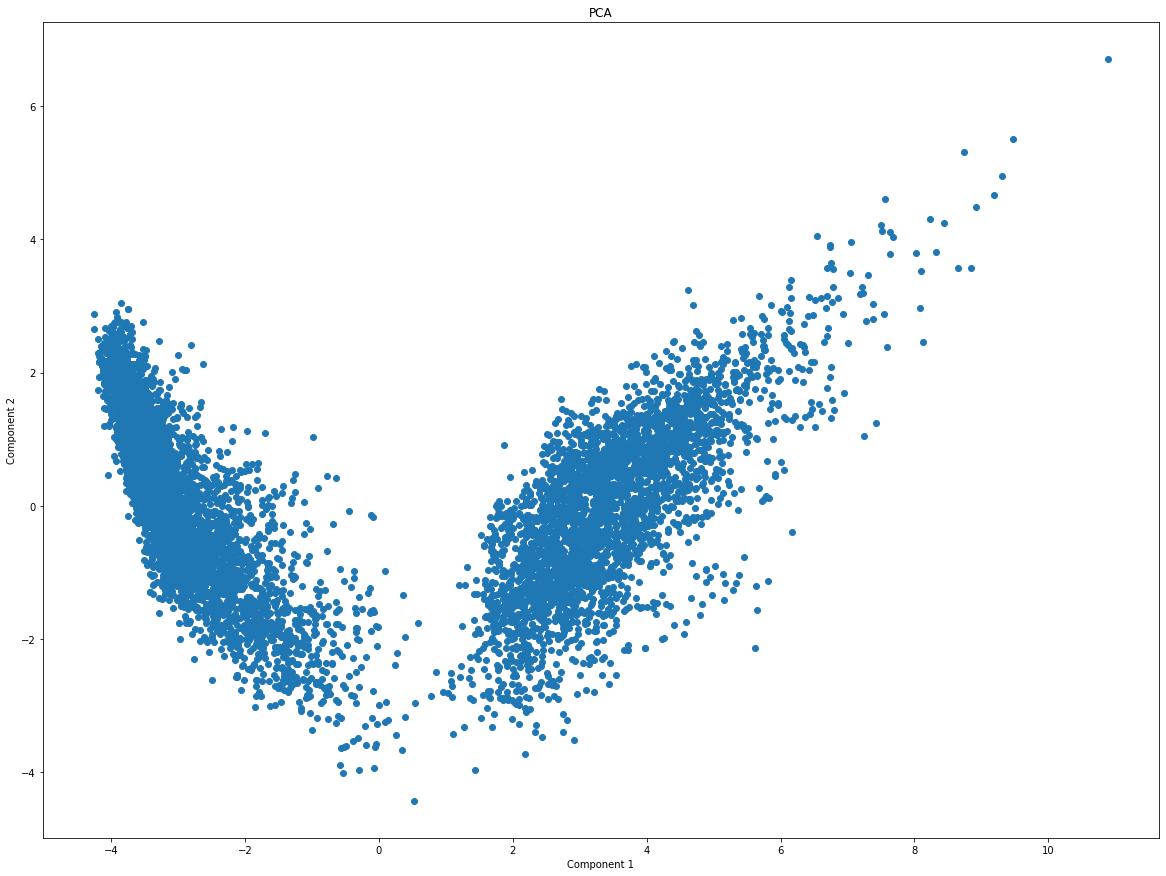

In [67]:
plot_components("PCA", X_train)

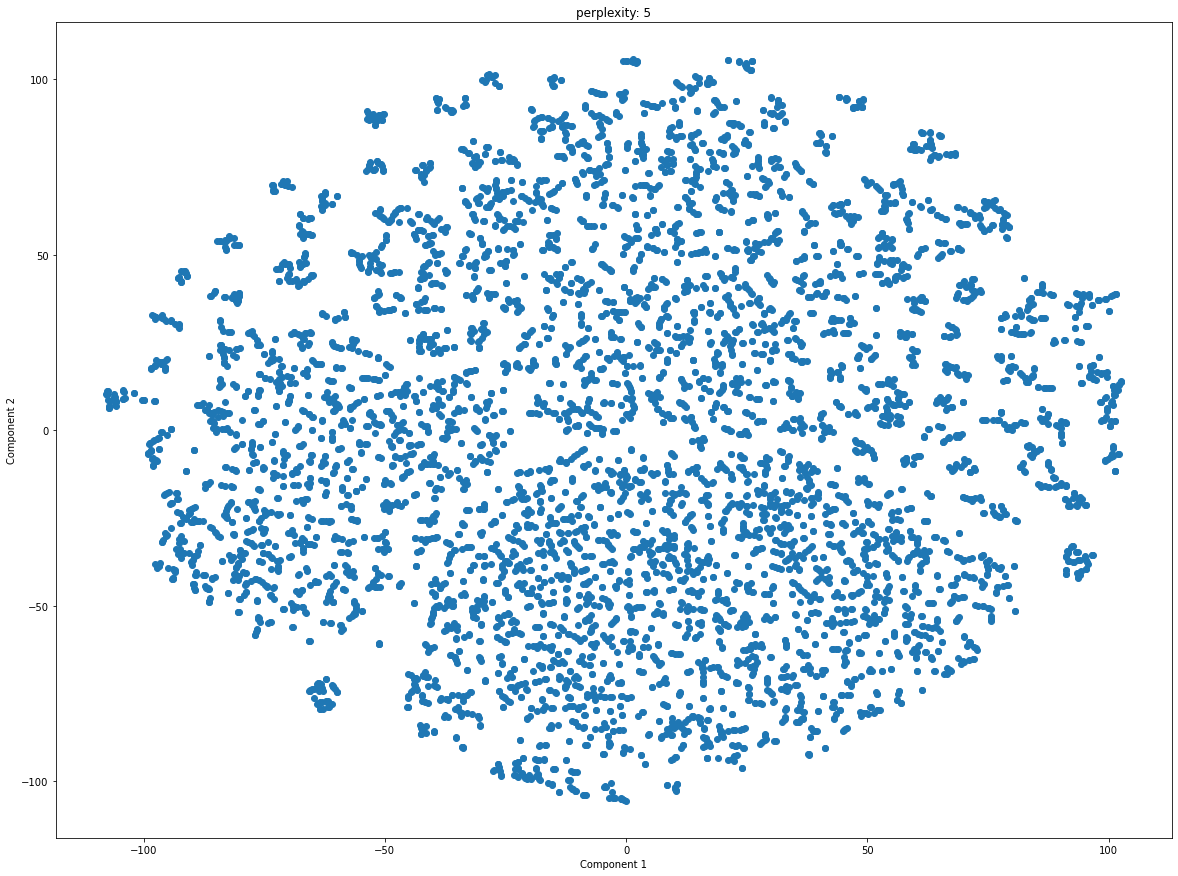

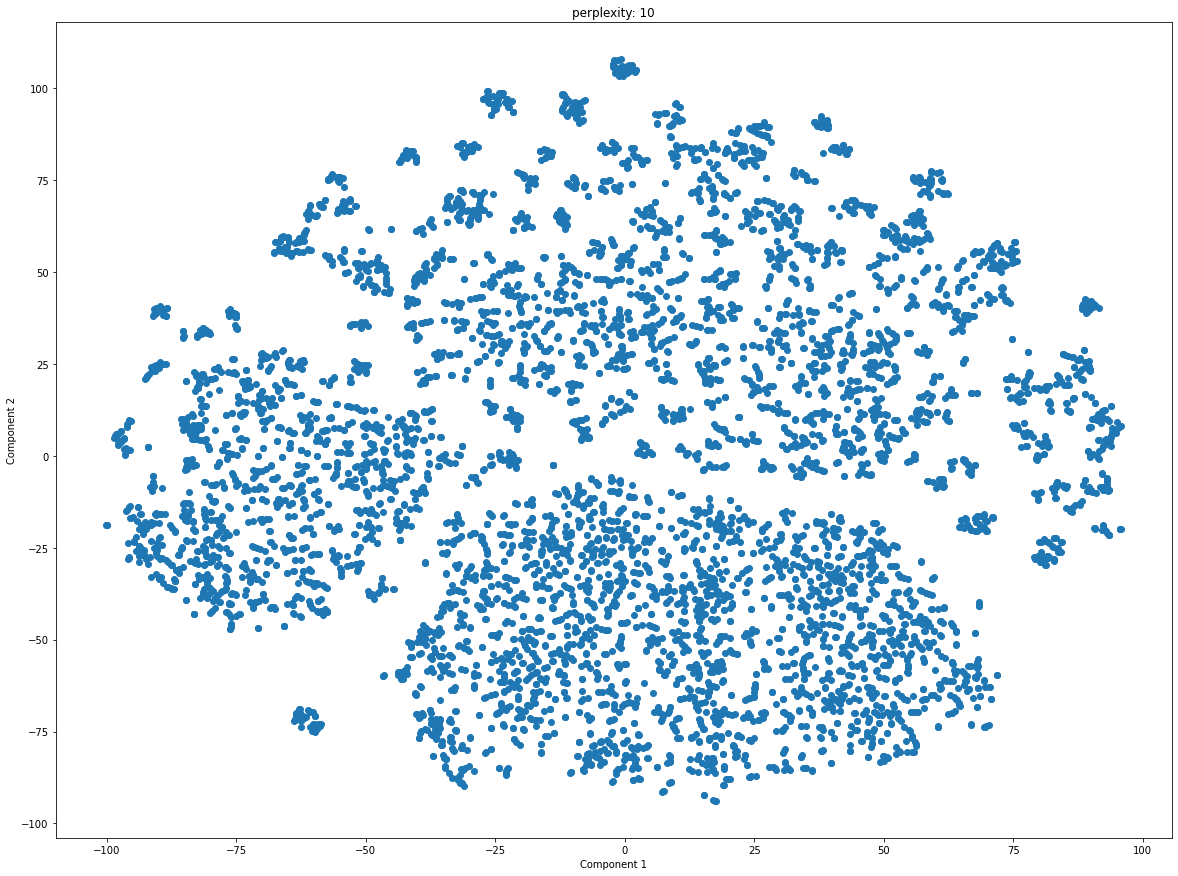

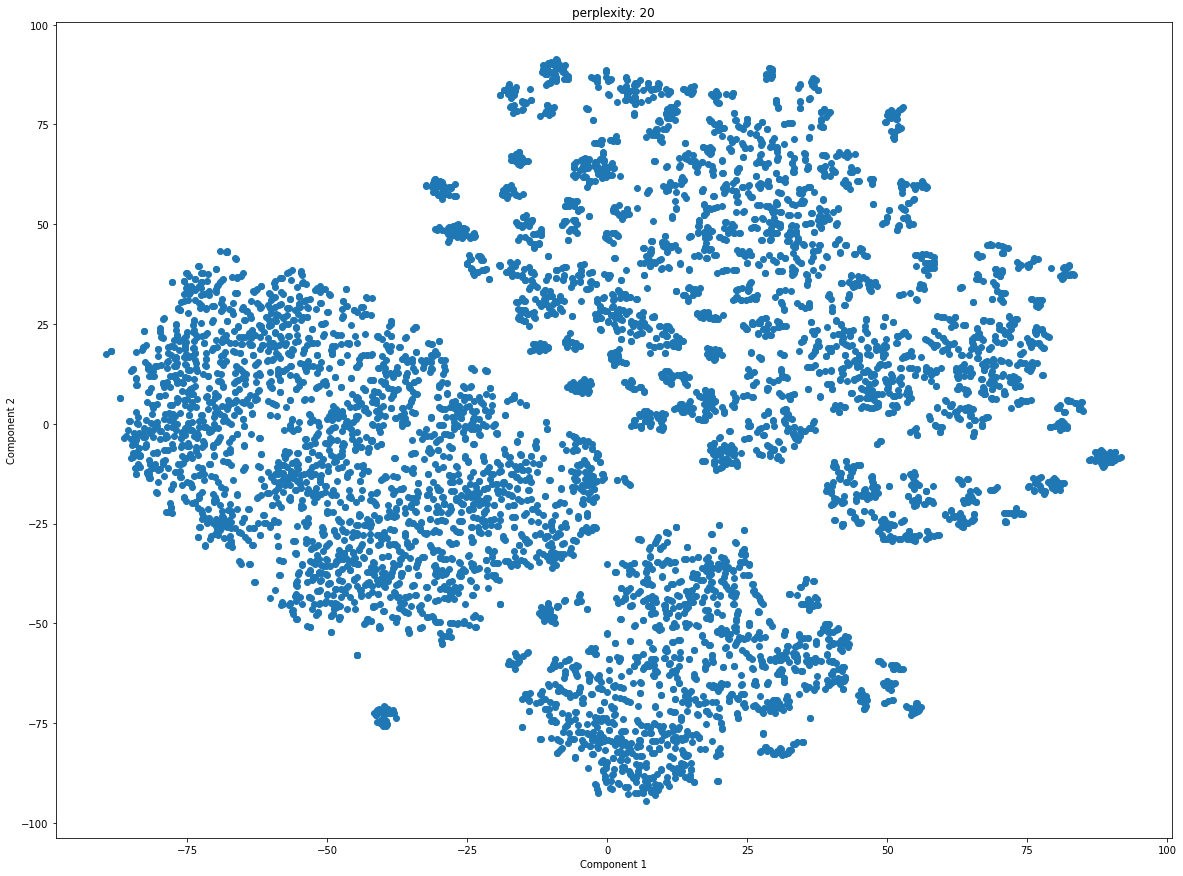

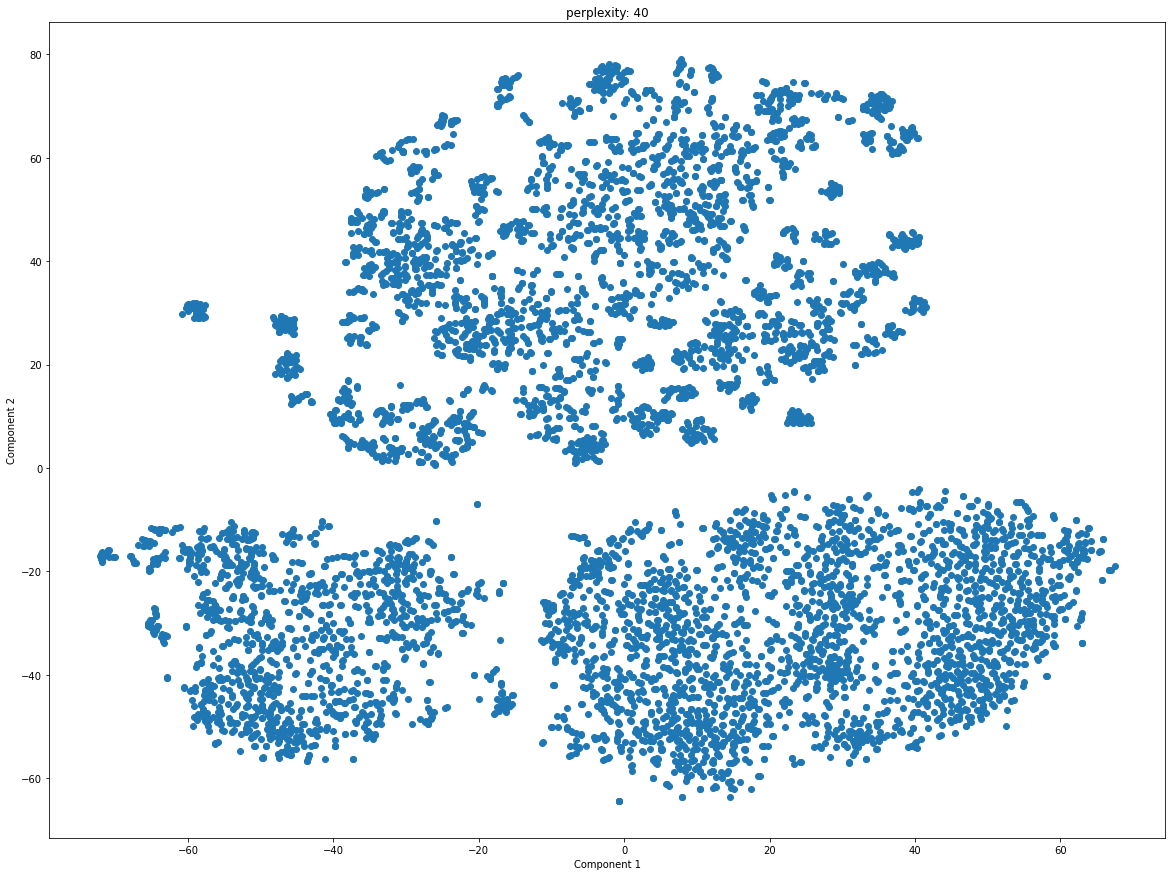

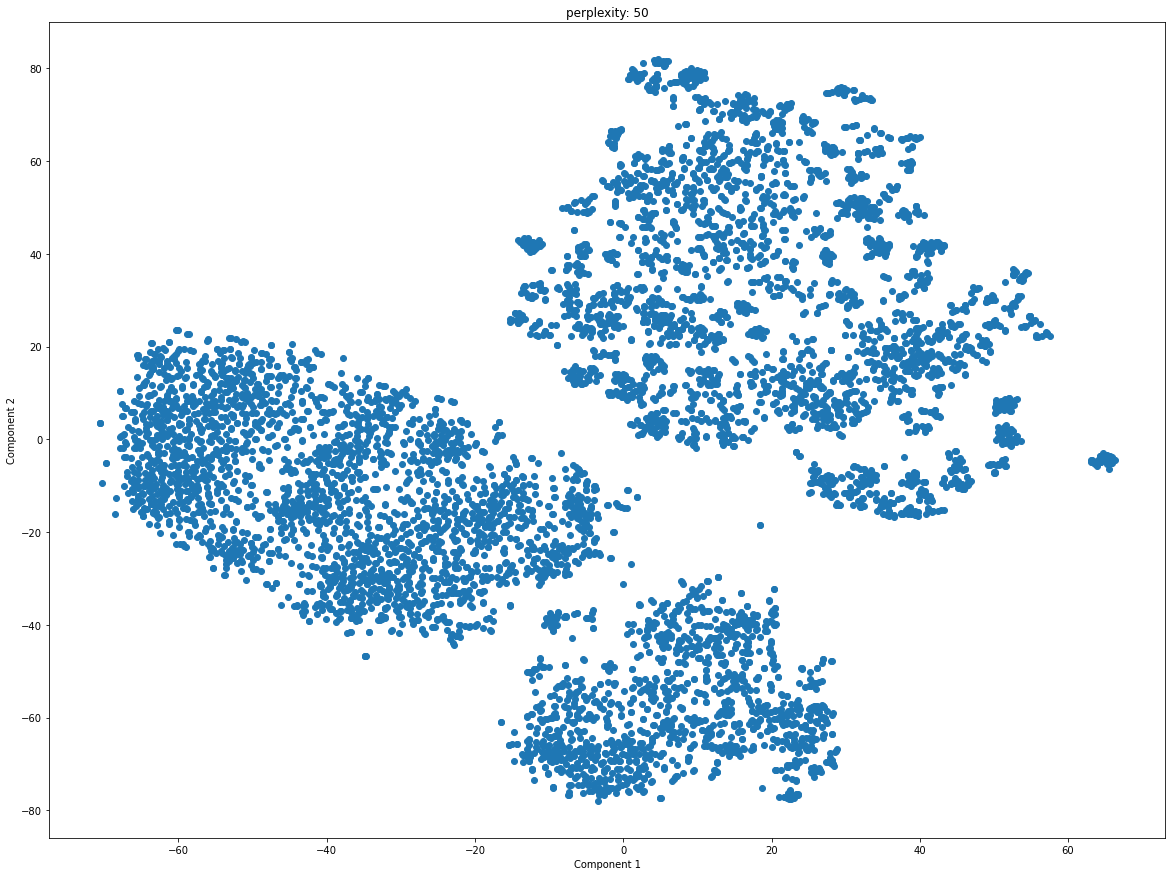

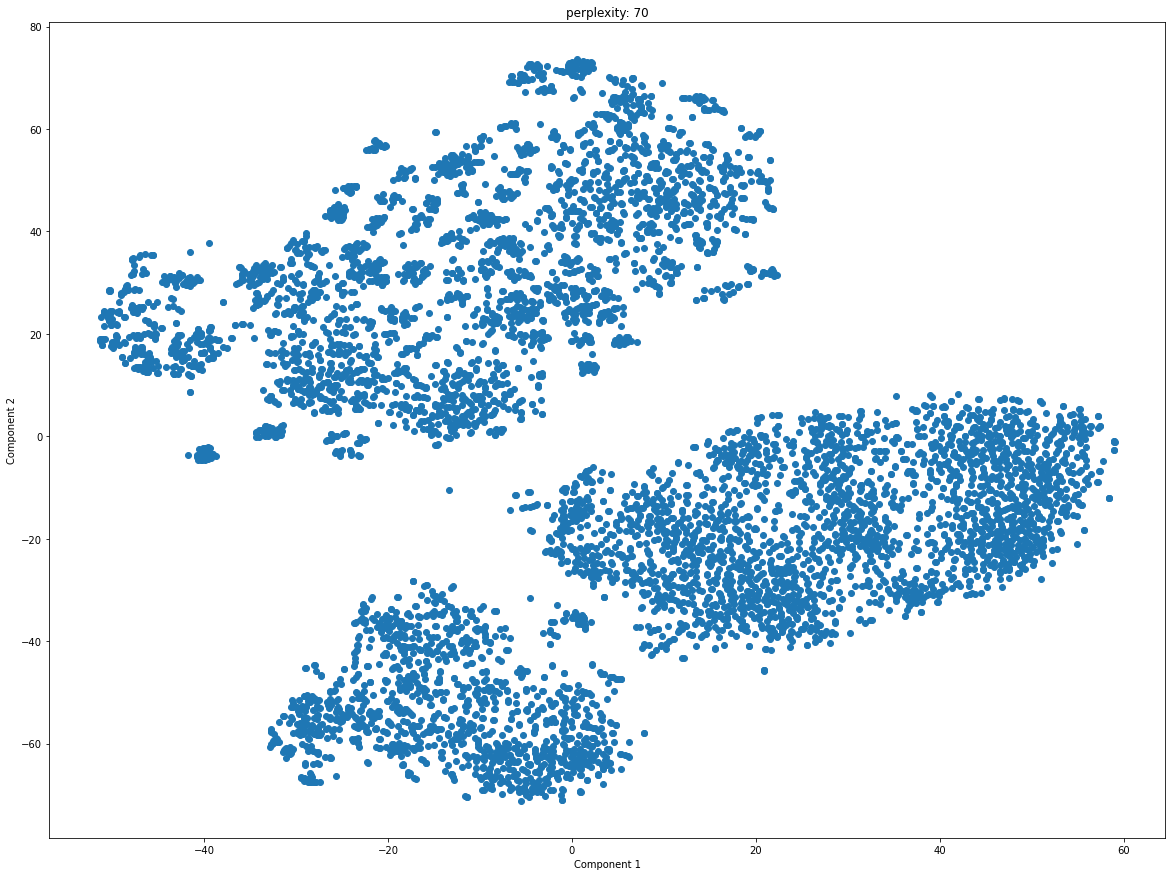

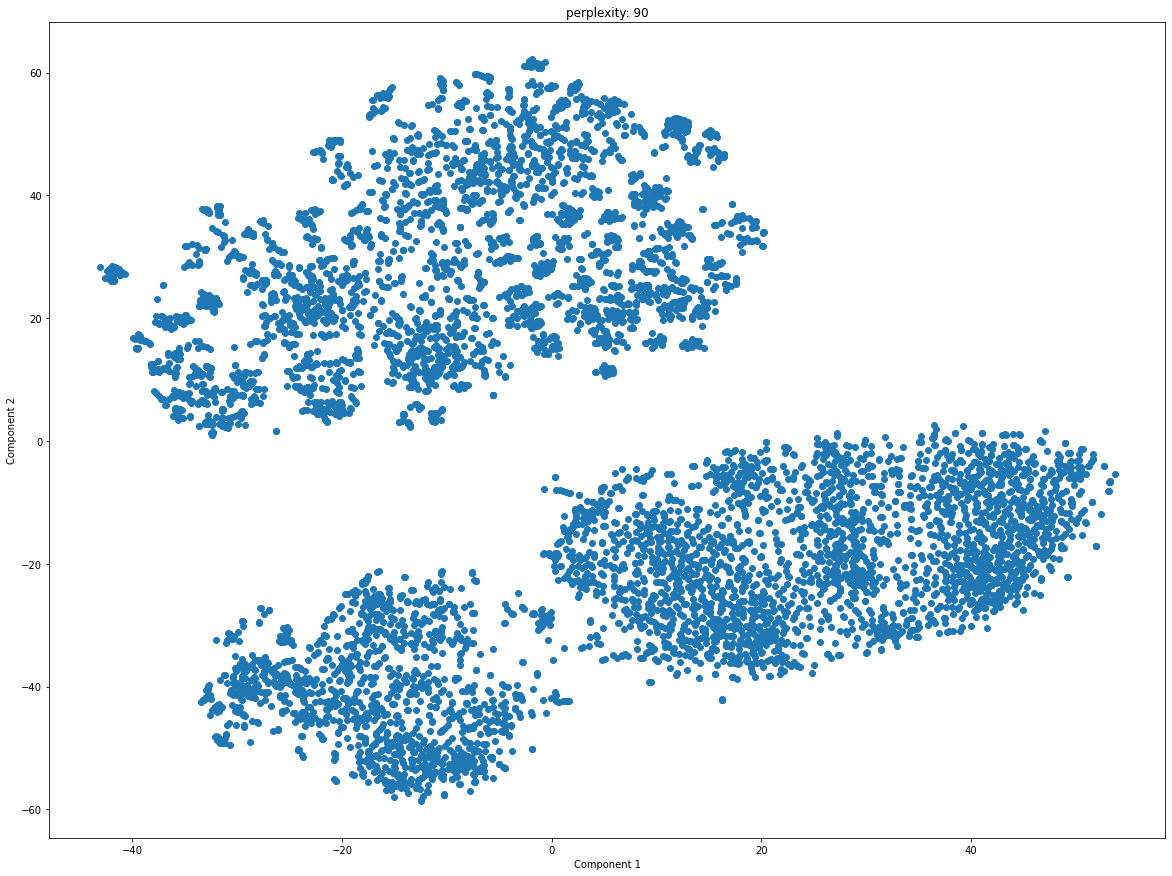

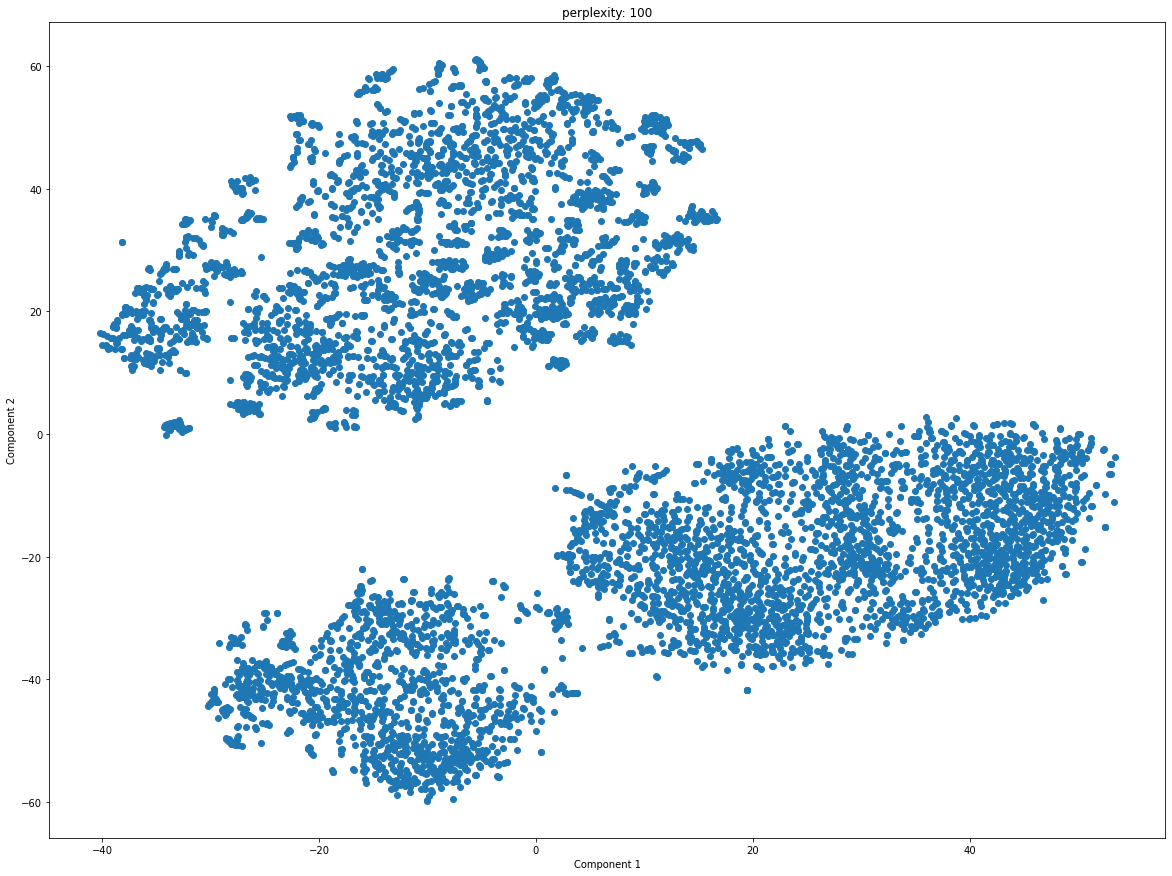

In [60]:
perplexities = [5, 10, 20, 40, 50, 70, 90, 100]

for i in range(len(perplexities)):
        plot_components("TSNE", X_train, perplexity=perplexities[i], title=False)
        plt.title("perplexity: " + str(perplexities[i]))
        plt.show()

In [7]:
best_tsne = choose_best_tsne(X_train, 50)

In [65]:
best_tsne.kl_divergence_

1.5486414432525635

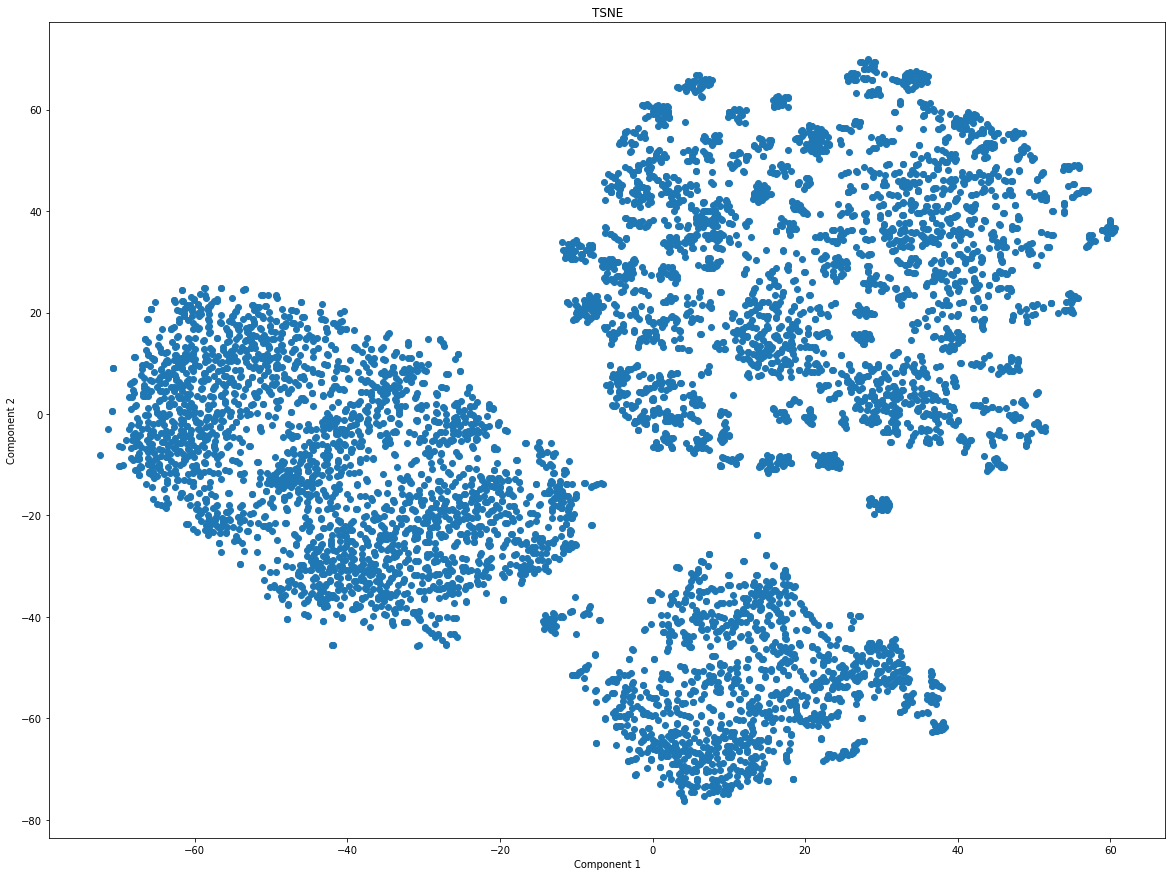

In [66]:
plot_components("TSNE", X=best_tsne.embedding_, comp=True)

## Modeling

In [121]:
def plot_metrics(X, pca=True):
    model = KMeans(random_state=0)
    
    metrics = ["silhouette", "calinski_harabasz"]
    
    X_transformed = None
    if pca:
        X_transformed = PCA(n_components = 60).fit_transform(X)
    else:
        X_transformed = X
    
    for i in range(len(metrics)):
        visualizer = KElbowVisualizer(model, 
                              k=(2,10), 
                              metric=metrics[i], 
                              locate_elbow=False,
                              timings=False)
        
        visualizer.fit(X_transformed)
        visualizer.show()
        plt.show()
        

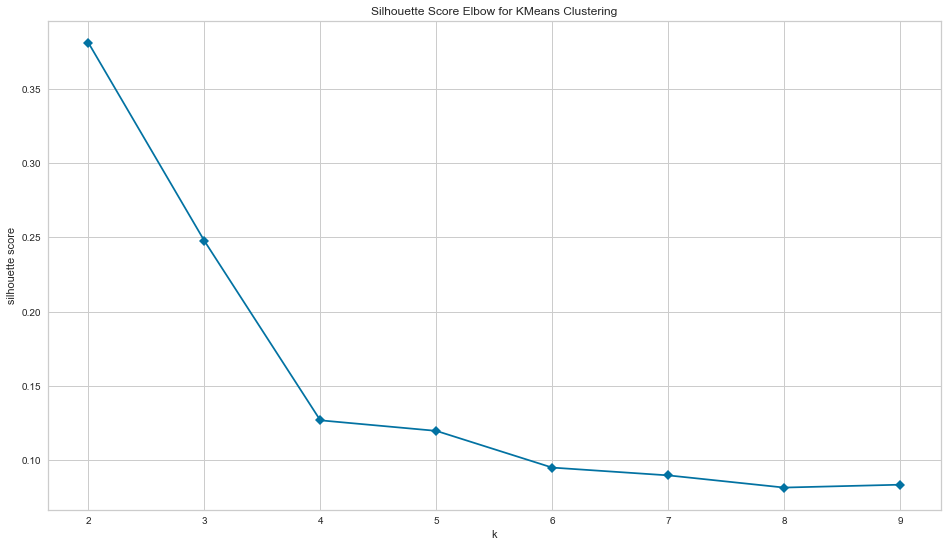

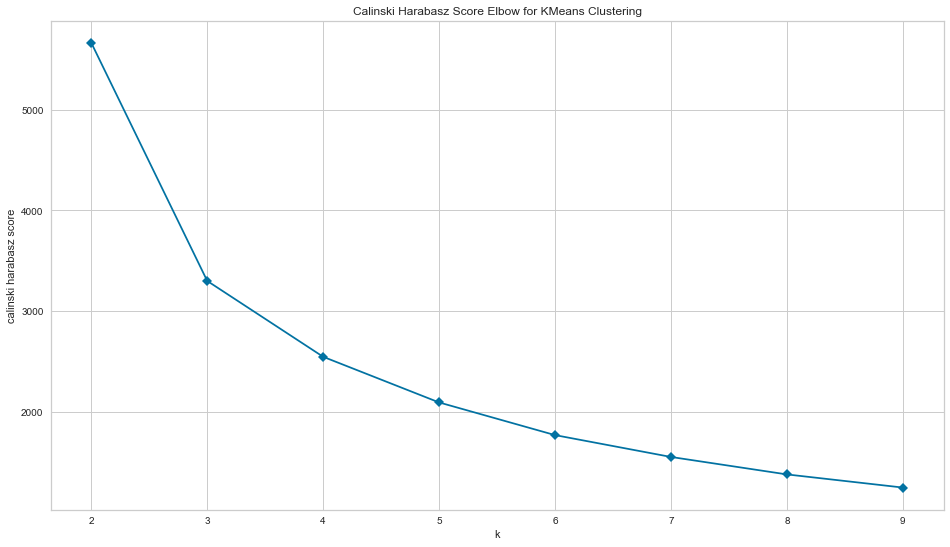

In [98]:
plot_metrics(X_train)

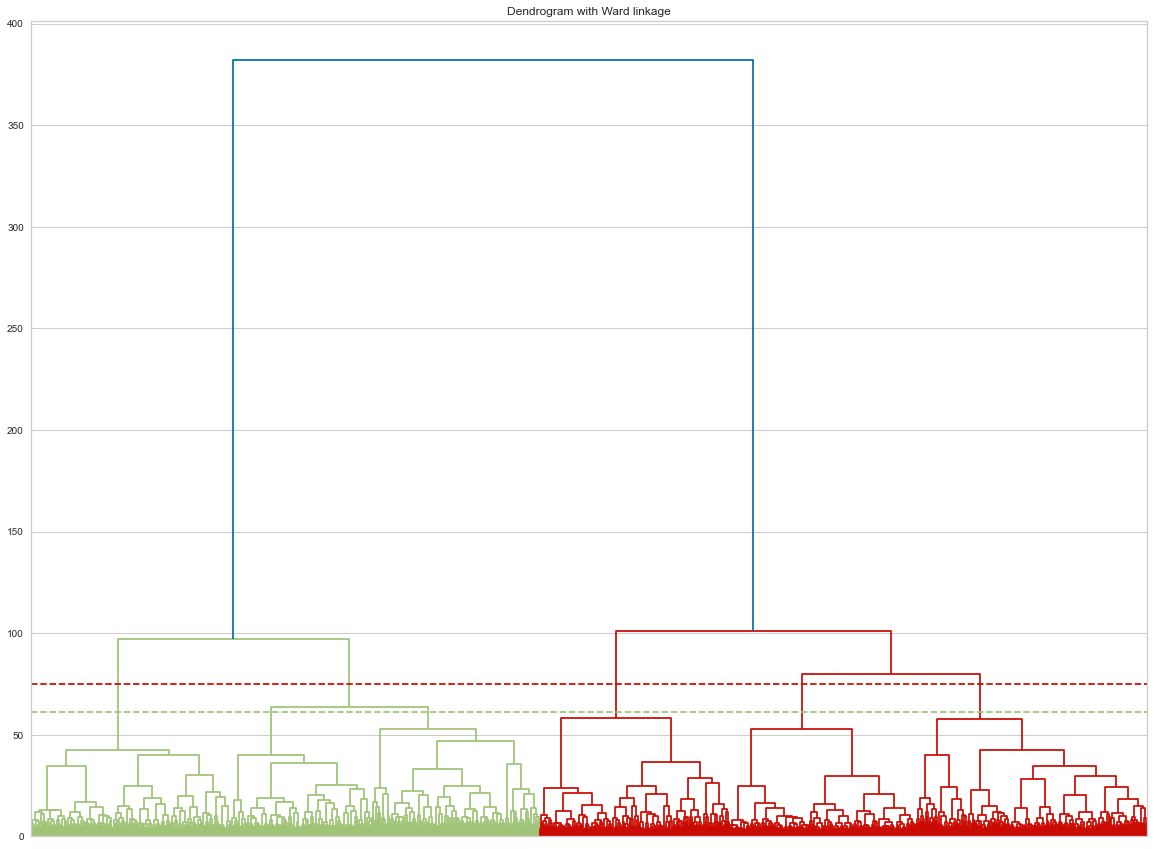

In [68]:
hierarchy.dendrogram(hierarchy.linkage(PCA(n_components = 60, 
                                           random_state = 42).fit_transform(X_train), 
                                       method="ward"), 
                     orientation="top")
plt.title("Dendrogram with Ward linkage")
plt.axhline(y=75, color="r", linestyle="dashed")
plt.axhline(y=61, color="g", linestyle="dashed")
ax = plt.gca()
ax.axes.xaxis.set_visible(False)

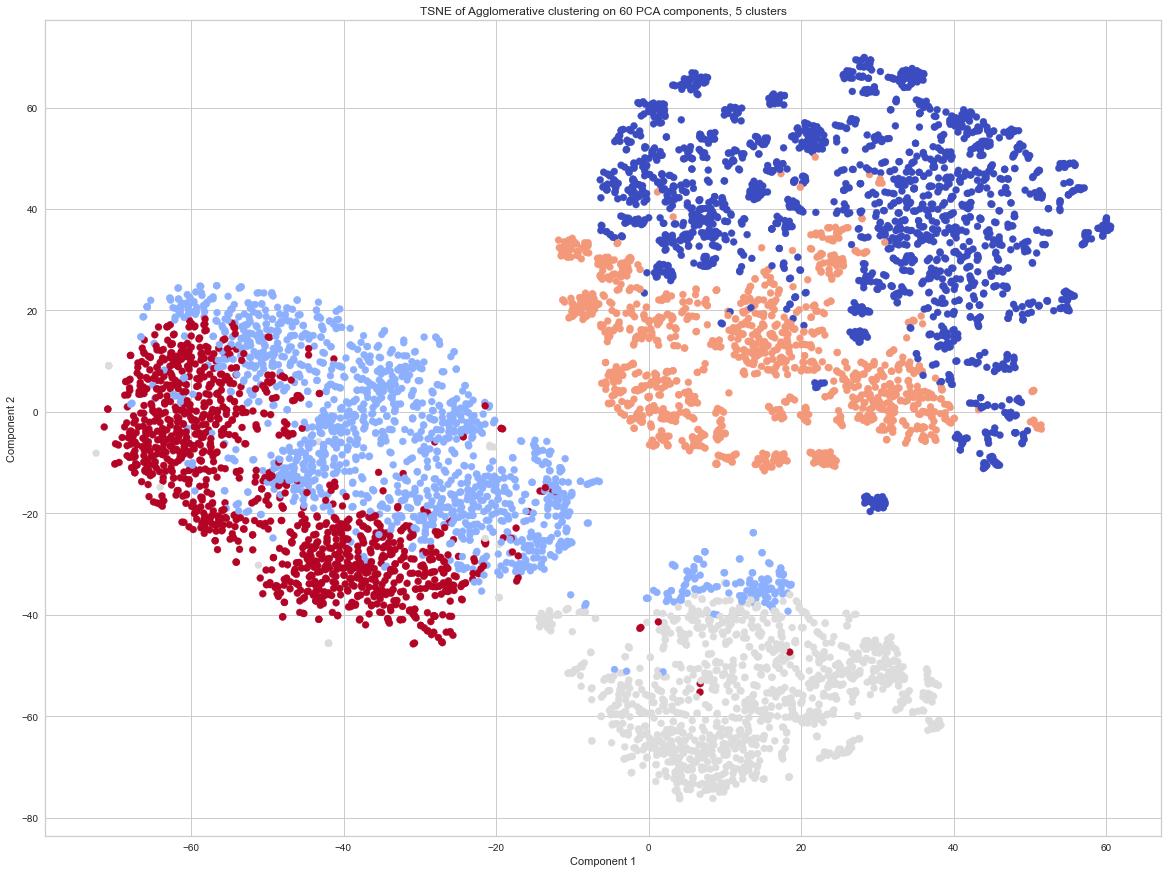

In [69]:
model = Pipeline(
                [("pca", PCA(n_components = 60, random_state = 42)),
                ("agglomerative", AgglomerativeClustering(n_clusters = None, 
                                                linkage = "ward",
                                                distance_threshold = 75))
                ])
model.fit(X_train)
labels = model["agglomerative"].labels_
plot_components("TSNE", best_tsne.embedding_, labels=labels, comp=True, title=False)
plt.title("TSNE of Agglomerative clustering on 60 PCA components, 5 clusters")
plt.show()

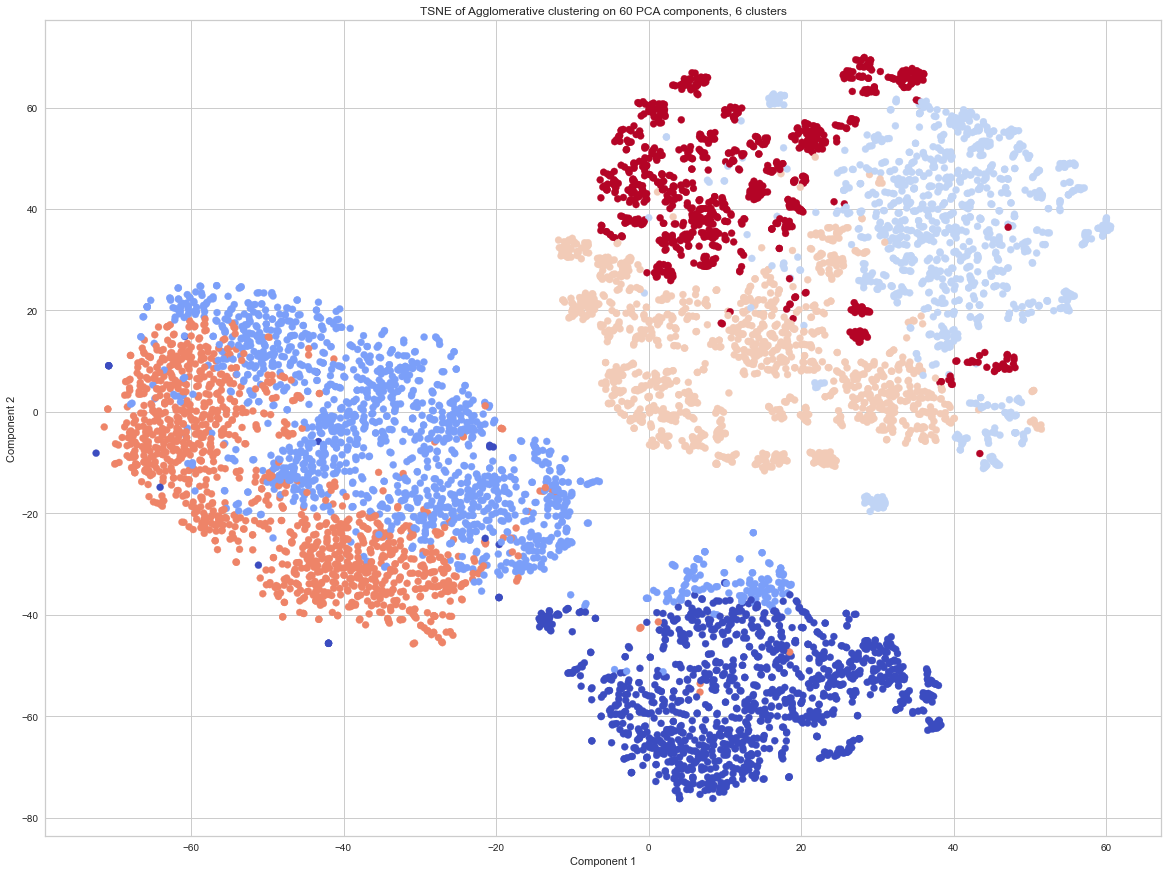

In [70]:
model = Pipeline(
                [("pca", PCA(n_components = 60, random_state = 42)),
                ("agglomerative", AgglomerativeClustering(n_clusters = None, 
                                                linkage = "ward",
                                                distance_threshold = 61))
                ])
model.fit(X_train)
labels = model["agglomerative"].labels_
plot_components("TSNE", best_tsne.embedding_, labels=labels, comp=True, title=False)
plt.title("TSNE of Agglomerative clustering on 60 PCA components, 6 clusters")
plt.show()

## Ciekawostka

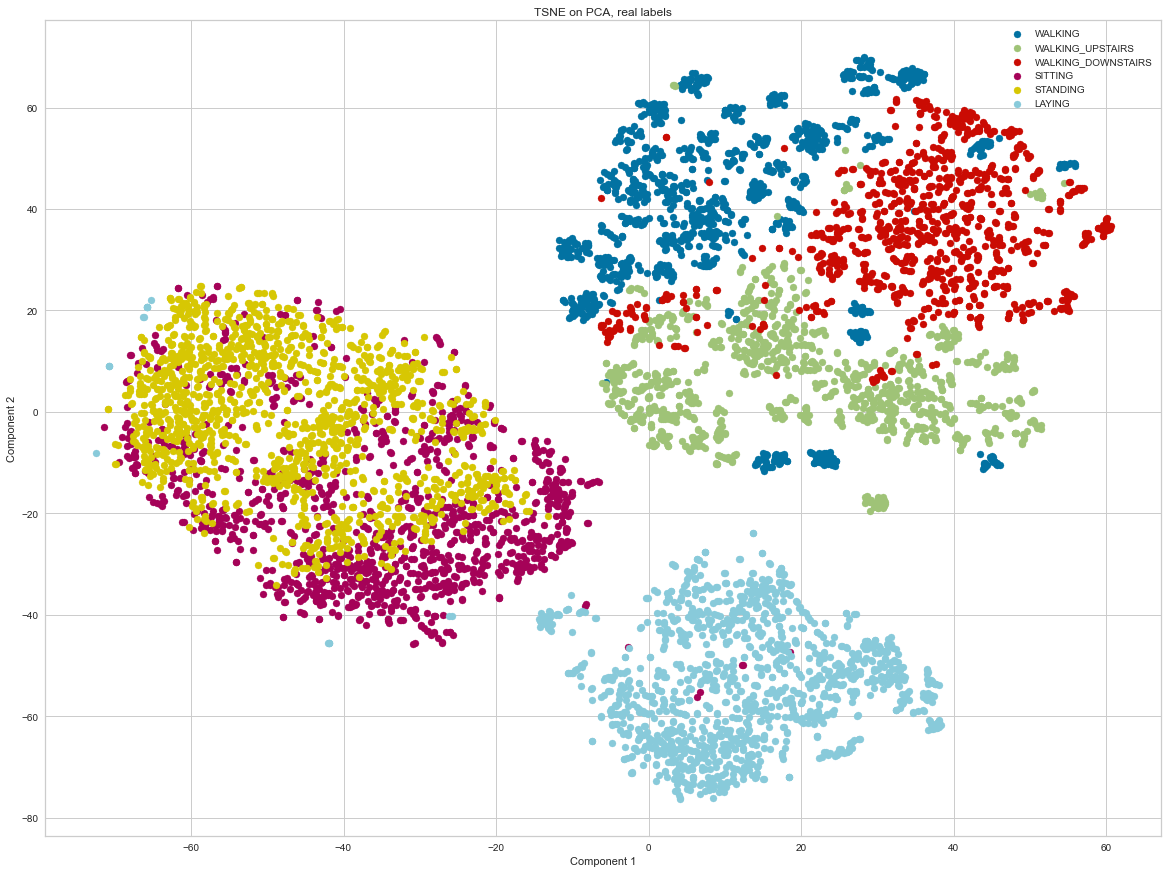

In [74]:
classes  = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]
plot_components("TSNE", best_tsne.embedding_, labels=y_train, comp=True, title=False,
                legend_labels=classes)
plt.title("TSNE on PCA, real labels")
plt.show()